# เดือนไหนควรซื้อหุ้น
#### ตัวอย่าง ซื้อหุ้น Apple เดือนไหนดีนะ 🍏
![title](img/lab34.png)

In [384]:
import pandas as pd
import numpy as np

import starfishX as sx
from tvDatafeed import TvDatafeed, Interval

import mplcyberpunk
import matplotlib.pyplot as plt 

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use("cyberpunk")

In [385]:
print(sx.__version__)

0.155544


In [386]:
tv = TvDatafeed()

In [387]:
df = tv.get_hist(symbol='aapl',exchange='nasdaq',interval=Interval.in_monthly,n_bars=120)

In [388]:
df['Date'] = pd.to_datetime(df.index)
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
#df = df.set_index('Date')
df.head(5)

symbol       open       high        low      close  \
datetime                                                                       
2012-12-03 21:30:00  nasdaq:aapl  21.201761  21.235339  17.901053  19.006154   
2013-01-02 21:30:00  nasdaq:aapl  19.779268  19.821409  15.535699  16.267483   
2013-02-01 21:30:00  nasdaq:aapl  16.396773  17.319266  15.630695  15.764266   
2013-03-01 21:30:00  nasdaq:aapl  15.642842  16.783910  14.964271  15.809267   
2013-04-01 20:30:00  nasdaq:aapl  15.782124  15.901770  13.753561  15.813557   

                           volume        Date  
datetime                                       
2012-12-03 21:30:00  1.213588e+10  2012-12-03  
2013-01-02 21:30:00  1.312366e+10  2013-01-02  
2013-02-01 21:30:00  9.344348e+09  2013-02-01  
2013-03-01 21:30:00  9.177540e+09  2013-03-01  
2013-04-01 20:30:00  1.096504e+10  2013-04-01

In [389]:
df.Date = pd.to_datetime(df.Date)
df['month'] = df.Date.dt.month.values
df['year'] = df.Date.dt.year.values
df

symbol        open        high         low  \
datetime                                                               
2012-12-03 21:30:00  nasdaq:aapl   21.201761   21.235339   17.901053   
2013-01-02 21:30:00  nasdaq:aapl   19.779268   19.821409   15.535699   
2013-02-01 21:30:00  nasdaq:aapl   16.396773   17.319266   15.630695   
2013-03-01 21:30:00  nasdaq:aapl   15.642842   16.783910   14.964271   
2013-04-01 20:30:00  nasdaq:aapl   15.782124   15.901770   13.753561   
...                          ...         ...         ...         ...   
2022-07-01 20:30:00  nasdaq:aapl  136.040000  163.630000  135.660000   
2022-08-01 20:30:00  nasdaq:aapl  161.010000  176.150000  157.140000   
2022-09-01 20:30:00  nasdaq:aapl  156.640000  164.260000  138.000000   
2022-10-03 20:30:00  nasdaq:aapl  138.210000  157.500000  134.370000   
2022-11-01 20:30:00  nasdaq:aapl  155.080000  155.450000  138.750000   

                          close        volume       Date  month  year  
datetime                                                               
2012-12-03 21:30:00   19.006154  1.213588e+10 2012-12-03     12  2012  
2013-01-02 21:30:00   16.267483  1.312366e+10 2013-01-02      1  2013  
2013-02-01 21:30:00   15.764266  9.344348e+09 2013-02-01      2  2013  
2013-03-01 21:30:00   15.809267  9.177540e+09 2013-03-01      3  2013  
2013-04-01 20:30:00   15.813557  1.096504e+10 2013-04-01      4  2013  
...                         ...           ...        ...    ...   ...  
2022-07-01 20:30:00  162.510000  1.447365e+09 2022-07-01      7  2022  
2022-08-01 20:30:00  157.220000  1.510325e+09 2022-08-01      8  2022  
2022-09-01 20:30:00  138.200000  2.084775e+09 2022-09-01      9  2022  
2022-10-03 20:30:00  153.340000  1.868381e+09 2022-10-03     10  2022  
2022-11-01 20:30:00  138.880000  2.719025e+08 2022-11-01     11  2022  

[120 rows x 9 columns]

In [390]:
df['pct_change_'] = df.close.pct_change()
df.head(5)

symbol       open       high        low      close  \
datetime                                                                       
2012-12-03 21:30:00  nasdaq:aapl  21.201761  21.235339  17.901053  19.006154   
2013-01-02 21:30:00  nasdaq:aapl  19.779268  19.821409  15.535699  16.267483   
2013-02-01 21:30:00  nasdaq:aapl  16.396773  17.319266  15.630695  15.764266   
2013-03-01 21:30:00  nasdaq:aapl  15.642842  16.783910  14.964271  15.809267   
2013-04-01 20:30:00  nasdaq:aapl  15.782124  15.901770  13.753561  15.813557   

                           volume       Date  month  year  pct_change_  
datetime                                                                
2012-12-03 21:30:00  1.213588e+10 2012-12-03     12  2012          NaN  
2013-01-02 21:30:00  1.312366e+10 2013-01-02      1  2013    -0.144094  
2013-02-01 21:30:00  9.344348e+09 2013-02-01      2  2013    -0.030934  
2013-03-01 21:30:00  9.177540e+09 2013-03-01      3  2013     0.002855  
2013-04-01 20:30:00  1.096504e+10 2013-04-01      4  2013     0.000271

In [391]:
df.tail(5)

symbol    open    high     low   close  \
datetime                                                           
2022-07-01 20:30:00  nasdaq:aapl  136.04  163.63  135.66  162.51   
2022-08-01 20:30:00  nasdaq:aapl  161.01  176.15  157.14  157.22   
2022-09-01 20:30:00  nasdaq:aapl  156.64  164.26  138.00  138.20   
2022-10-03 20:30:00  nasdaq:aapl  138.21  157.50  134.37  153.34   
2022-11-01 20:30:00  nasdaq:aapl  155.08  155.45  138.75  138.88   

                           volume       Date  month  year  pct_change_  
datetime                                                                
2022-07-01 20:30:00  1.447365e+09 2022-07-01      7  2022     0.188634  
2022-08-01 20:30:00  1.510325e+09 2022-08-01      8  2022    -0.032552  
2022-09-01 20:30:00  2.084775e+09 2022-09-01      9  2022    -0.120977  
2022-10-03 20:30:00  1.868381e+09 2022-10-03     10  2022     0.109551  
2022-11-01 20:30:00  2.719025e+08 2022-11-01     11  2022    -0.094300

In [392]:
df['pct_change_m'] = df['pct_change_'].shift(-1)
df.head(5)

symbol       open       high        low      close  \
datetime                                                                       
2012-12-03 21:30:00  nasdaq:aapl  21.201761  21.235339  17.901053  19.006154   
2013-01-02 21:30:00  nasdaq:aapl  19.779268  19.821409  15.535699  16.267483   
2013-02-01 21:30:00  nasdaq:aapl  16.396773  17.319266  15.630695  15.764266   
2013-03-01 21:30:00  nasdaq:aapl  15.642842  16.783910  14.964271  15.809267   
2013-04-01 20:30:00  nasdaq:aapl  15.782124  15.901770  13.753561  15.813557   

                           volume       Date  month  year  pct_change_  \
datetime                                                                 
2012-12-03 21:30:00  1.213588e+10 2012-12-03     12  2012          NaN   
2013-01-02 21:30:00  1.312366e+10 2013-01-02      1  2013    -0.144094   
2013-02-01 21:30:00  9.344348e+09 2013-02-01      2  2013    -0.030934   
2013-03-01 21:30:00  9.177540e+09 2013-03-01      3  2013     0.002855   
2013-04-01 20:30:00  1.096504e+10 2013-04-01      4  2013     0.000271   

                     pct_change_m  
datetime                           
2012-12-03 21:30:00     -0.144094  
2013-01-02 21:30:00     -0.030934  
2013-02-01 21:30:00      0.002855  
2013-03-01 21:30:00      0.000271  
2013-04-01 20:30:00      0.015708

In [393]:
df.tail(5)

symbol    open    high     low   close  \
datetime                                                           
2022-07-01 20:30:00  nasdaq:aapl  136.04  163.63  135.66  162.51   
2022-08-01 20:30:00  nasdaq:aapl  161.01  176.15  157.14  157.22   
2022-09-01 20:30:00  nasdaq:aapl  156.64  164.26  138.00  138.20   
2022-10-03 20:30:00  nasdaq:aapl  138.21  157.50  134.37  153.34   
2022-11-01 20:30:00  nasdaq:aapl  155.08  155.45  138.75  138.88   

                           volume       Date  month  year  pct_change_  \
datetime                                                                 
2022-07-01 20:30:00  1.447365e+09 2022-07-01      7  2022     0.188634   
2022-08-01 20:30:00  1.510325e+09 2022-08-01      8  2022    -0.032552   
2022-09-01 20:30:00  2.084775e+09 2022-09-01      9  2022    -0.120977   
2022-10-03 20:30:00  1.868381e+09 2022-10-03     10  2022     0.109551   
2022-11-01 20:30:00  2.719025e+08 2022-11-01     11  2022    -0.094300   

                     pct_change_m  
datetime                           
2022-07-01 20:30:00     -0.032552  
2022-08-01 20:30:00     -0.120977  
2022-09-01 20:30:00      0.109551  
2022-10-03 20:30:00     -0.094300  
2022-11-01 20:30:00           NaN

In [394]:
df.drop(index=df.index[-1], 
        axis=0, 
        inplace=True)

In [395]:
df.tail(5)

symbol    open    high     low   close  \
datetime                                                           
2022-06-01 20:30:00  nasdaq:aapl  149.90  151.74  129.04  136.72   
2022-07-01 20:30:00  nasdaq:aapl  136.04  163.63  135.66  162.51   
2022-08-01 20:30:00  nasdaq:aapl  161.01  176.15  157.14  157.22   
2022-09-01 20:30:00  nasdaq:aapl  156.64  164.26  138.00  138.20   
2022-10-03 20:30:00  nasdaq:aapl  138.21  157.50  134.37  153.34   

                           volume       Date  month  year  pct_change_  \
datetime                                                                 
2022-06-01 20:30:00  1.749298e+09 2022-06-01      6  2022    -0.081430   
2022-07-01 20:30:00  1.447365e+09 2022-07-01      7  2022     0.188634   
2022-08-01 20:30:00  1.510325e+09 2022-08-01      8  2022    -0.032552   
2022-09-01 20:30:00  2.084775e+09 2022-09-01      9  2022    -0.120977   
2022-10-03 20:30:00  1.868381e+09 2022-10-03     10  2022     0.109551   

                     pct_change_m  
datetime                           
2022-06-01 20:30:00      0.188634  
2022-07-01 20:30:00     -0.032552  
2022-08-01 20:30:00     -0.120977  
2022-09-01 20:30:00      0.109551  
2022-10-03 20:30:00     -0.094300

In [396]:
df = df.dropna()
df

symbol        open        high         low  \
datetime                                                               
2013-01-02 21:30:00  nasdaq:aapl   19.779268   19.821409   15.535699   
2013-02-01 21:30:00  nasdaq:aapl   16.396773   17.319266   15.630695   
2013-03-01 21:30:00  nasdaq:aapl   15.642842   16.783910   14.964271   
2013-04-01 20:30:00  nasdaq:aapl   15.782124   15.901770   13.753561   
2013-05-01 20:30:00  nasdaq:aapl   15.873554   16.633912   14.960696   
...                          ...         ...         ...         ...   
2022-06-01 20:30:00  nasdaq:aapl  149.900000  151.740000  129.040000   
2022-07-01 20:30:00  nasdaq:aapl  136.040000  163.630000  135.660000   
2022-08-01 20:30:00  nasdaq:aapl  161.010000  176.150000  157.140000   
2022-09-01 20:30:00  nasdaq:aapl  156.640000  164.260000  138.000000   
2022-10-03 20:30:00  nasdaq:aapl  138.210000  157.500000  134.370000   

                          close        volume       Date  month  year  \
datetime                                                                
2013-01-02 21:30:00   16.267483  1.312366e+10 2013-01-02      1  2013   
2013-02-01 21:30:00   15.764266  9.344348e+09 2013-02-01      2  2013   
2013-03-01 21:30:00   15.809267  9.177540e+09 2013-03-01      3  2013   
2013-04-01 20:30:00   15.813557  1.096504e+10 2013-04-01      4  2013   
2013-05-01 20:30:00   16.061952  9.450570e+09 2013-05-01      5  2013   
...                         ...           ...        ...    ...   ...   
2022-06-01 20:30:00  136.720000  1.749298e+09 2022-06-01      6  2022   
2022-07-01 20:30:00  162.510000  1.447365e+09 2022-07-01      7  2022   
2022-08-01 20:30:00  157.220000  1.510325e+09 2022-08-01      8  2022   
2022-09-01 20:30:00  138.200000  2.084775e+09 2022-09-01      9  2022   
2022-10-03 20:30:00  153.340000  1.868381e+09 2022-10-03     10  2022   

                     pct_change_  pct_change_m  
datetime                                        
2013-01-02 21:30:00    -0.144094     -0.030934  
2013-02-01 21:30:00    -0.030934      0.002855  
2013-03-01 21:30:00     0.002855      0.000271  
2013-04-01 20:30:00     0.000271      0.015708  
2013-05-01 20:30:00     0.015708     -0.118303  
...                          ...           ...  
2022-06-01 20:30:00    -0.081430      0.188634  
2022-07-01 20:30:00     0.188634     -0.032552  
2022-08-01 20:30:00    -0.032552     -0.120977  
2022-09-01 20:30:00    -0.120977      0.109551  
2022-10-03 20:30:00     0.109551     -0.094300  

[118 rows x 11 columns]

In [397]:
df['month_win'] = np.where(df.pct_change_m>=0,1,0)
df

/var/folders/w2/d201xf4j1r5c5k0m_bqxgqqh0000gn/T/ipykernel_34618/715194271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_win'] = np.where(df.pct_change_m>=0,1,0)


symbol        open        high         low  \
datetime                                                               
2013-01-02 21:30:00  nasdaq:aapl   19.779268   19.821409   15.535699   
2013-02-01 21:30:00  nasdaq:aapl   16.396773   17.319266   15.630695   
2013-03-01 21:30:00  nasdaq:aapl   15.642842   16.783910   14.964271   
2013-04-01 20:30:00  nasdaq:aapl   15.782124   15.901770   13.753561   
2013-05-01 20:30:00  nasdaq:aapl   15.873554   16.633912   14.960696   
...                          ...         ...         ...         ...   
2022-06-01 20:30:00  nasdaq:aapl  149.900000  151.740000  129.040000   
2022-07-01 20:30:00  nasdaq:aapl  136.040000  163.630000  135.660000   
2022-08-01 20:30:00  nasdaq:aapl  161.010000  176.150000  157.140000   
2022-09-01 20:30:00  nasdaq:aapl  156.640000  164.260000  138.000000   
2022-10-03 20:30:00  nasdaq:aapl  138.210000  157.500000  134.370000   

                          close        volume       Date  month  year  \
datetime                                                                
2013-01-02 21:30:00   16.267483  1.312366e+10 2013-01-02      1  2013   
2013-02-01 21:30:00   15.764266  9.344348e+09 2013-02-01      2  2013   
2013-03-01 21:30:00   15.809267  9.177540e+09 2013-03-01      3  2013   
2013-04-01 20:30:00   15.813557  1.096504e+10 2013-04-01      4  2013   
2013-05-01 20:30:00   16.061952  9.450570e+09 2013-05-01      5  2013   
...                         ...           ...        ...    ...   ...   
2022-06-01 20:30:00  136.720000  1.749298e+09 2022-06-01      6  2022   
2022-07-01 20:30:00  162.510000  1.447365e+09 2022-07-01      7  2022   
2022-08-01 20:30:00  157.220000  1.510325e+09 2022-08-01      8  2022   
2022-09-01 20:30:00  138.200000  2.084775e+09 2022-09-01      9  2022   
2022-10-03 20:30:00  153.340000  1.868381e+09 2022-10-03     10  2022   

                     pct_change_  pct_change_m  month_win  
datetime                                                   
2013-01-02 21:30:00    -0.144094     -0.030934          0  
2013-02-01 21:30:00    -0.030934      0.002855          1  
2013-03-01 21:30:00     0.002855      0.000271          1  
2013-04-01 20:30:00     0.000271      0.015708          1  
2013-05-01 20:30:00     0.015708     -0.118303          0  
...                          ...           ...        ...  
2022-06-01 20:30:00    -0.081430      0.188634          1  
2022-07-01 20:30:00     0.188634     -0.032552          0  
2022-08-01 20:30:00    -0.032552     -0.120977          0  
2022-09-01 20:30:00    -0.120977      0.109551          1  
2022-10-03 20:30:00     0.109551     -0.094300          0  

[118 rows x 12 columns]

<AxesSubplot:xlabel='month'>

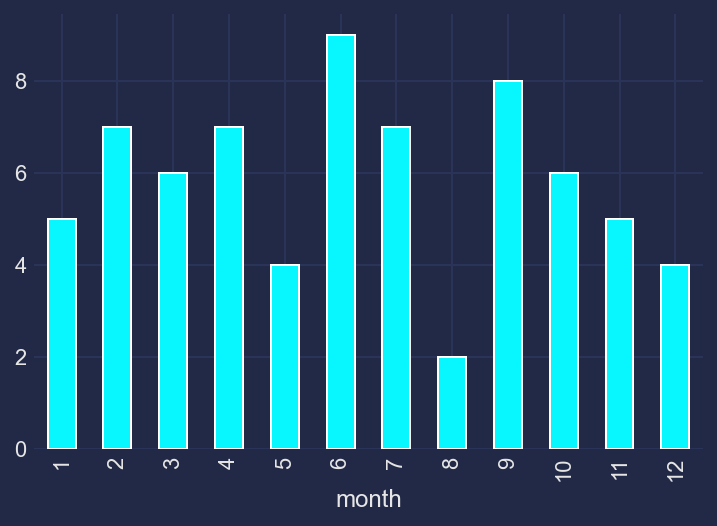

In [398]:
df.groupby(df.month)['month_win'].sum().plot(kind='bar')

In [399]:
df.groupby(df.index.month)['month_win'].sum() , df.groupby(df.index.month)['month_win'].sum().sum(),len(df)

(datetime
 1     5
 2     7
 3     6
 4     7
 5     4
 6     9
 7     7
 8     2
 9     8
 10    6
 11    5
 12    4
 Name: month_win, dtype: int64,
 70,
 118)

In [400]:
70/118

0.5932203389830508

In [401]:
df.groupby(df.index.month).size()

datetime
1     10
2     10
3     10
4     10
5     10
6     10
7     10
8     10
9     10
10    10
11     9
12     9
dtype: int64

<AxesSubplot:xlabel='datetime'>

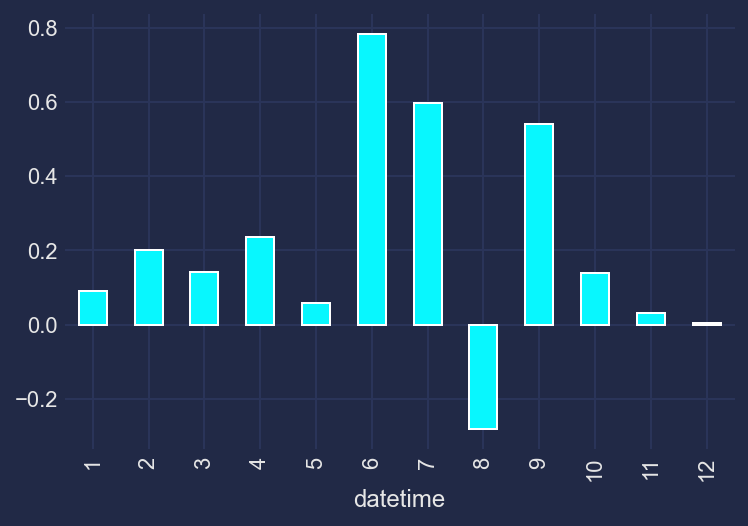

In [402]:
df.groupby(df.index.month)['pct_change_m'].sum().plot(kind='bar')

In [410]:
df.groupby(df.index.month)['pct_change_m'].mean()

Date
1     0.008995
2     0.020136
3     0.014134
4     0.023549
5     0.005839
6     0.078296
7     0.059803
8    -0.028199
9     0.054130
10    0.013809
11    0.003376
12    0.000394
Name: pct_change_m, dtype: float64

In [404]:
df[df['month']==6].pct_change_m

datetime
2013-06-03 20:30:00    0.141225
2014-06-02 20:30:00    0.028731
2015-06-01 20:30:00   -0.032888
2016-06-01 20:30:00    0.090063
2017-06-01 20:30:00    0.032704
2018-06-01 20:30:00    0.027983
2019-06-03 20:30:00    0.076395
2020-06-01 20:30:00    0.165132
2021-06-01 20:30:00    0.064982
2022-06-01 20:30:00    0.188634
Name: pct_change_m, dtype: float64

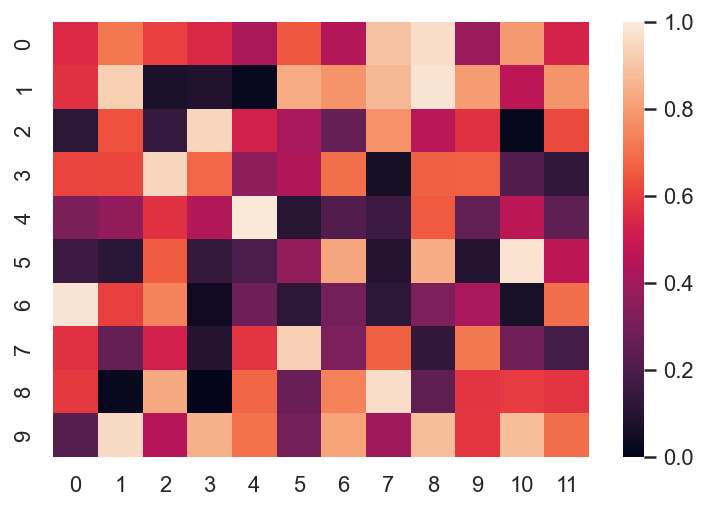

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)
sns.set()
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)
plt.show()

In [406]:
df = df.set_index('Date')
df

symbol        open        high         low       close  \
Date                                                                      
2013-01-02  nasdaq:aapl   19.779268   19.821409   15.535699   16.267483   
2013-02-01  nasdaq:aapl   16.396773   17.319266   15.630695   15.764266   
2013-03-01  nasdaq:aapl   15.642842   16.783910   14.964271   15.809267   
2013-04-01  nasdaq:aapl   15.782124   15.901770   13.753561   15.813557   
2013-05-01  nasdaq:aapl   15.873554   16.633912   14.960696   16.061952   
...                 ...         ...         ...         ...         ...   
2022-06-01  nasdaq:aapl  149.900000  151.740000  129.040000  136.720000   
2022-07-01  nasdaq:aapl  136.040000  163.630000  135.660000  162.510000   
2022-08-01  nasdaq:aapl  161.010000  176.150000  157.140000  157.220000   
2022-09-01  nasdaq:aapl  156.640000  164.260000  138.000000  138.200000   
2022-10-03  nasdaq:aapl  138.210000  157.500000  134.370000  153.340000   

                  volume  month  year  pct_change_  pct_change_m  month_win  
Date                                                                         
2013-01-02  1.312366e+10      1  2013    -0.144094     -0.030934          0  
2013-02-01  9.344348e+09      2  2013    -0.030934      0.002855          1  
2013-03-01  9.177540e+09      3  2013     0.002855      0.000271          1  
2013-04-01  1.096504e+10      4  2013     0.000271      0.015708          1  
2013-05-01  9.450570e+09      5  2013     0.015708     -0.118303          0  
...                  ...    ...   ...          ...           ...        ...  
2022-06-01  1.749298e+09      6  2022    -0.081430      0.188634          1  
2022-07-01  1.447365e+09      7  2022     0.188634     -0.032552          0  
2022-08-01  1.510325e+09      8  2022    -0.032552     -0.120977          0  
2022-09-01  2.084775e+09      9  2022    -0.120977      0.109551          1  
2022-10-03  1.868381e+09     10  2022     0.109551     -0.094300          0  

[118 rows x 11 columns]

In [414]:
9/10 

0.9

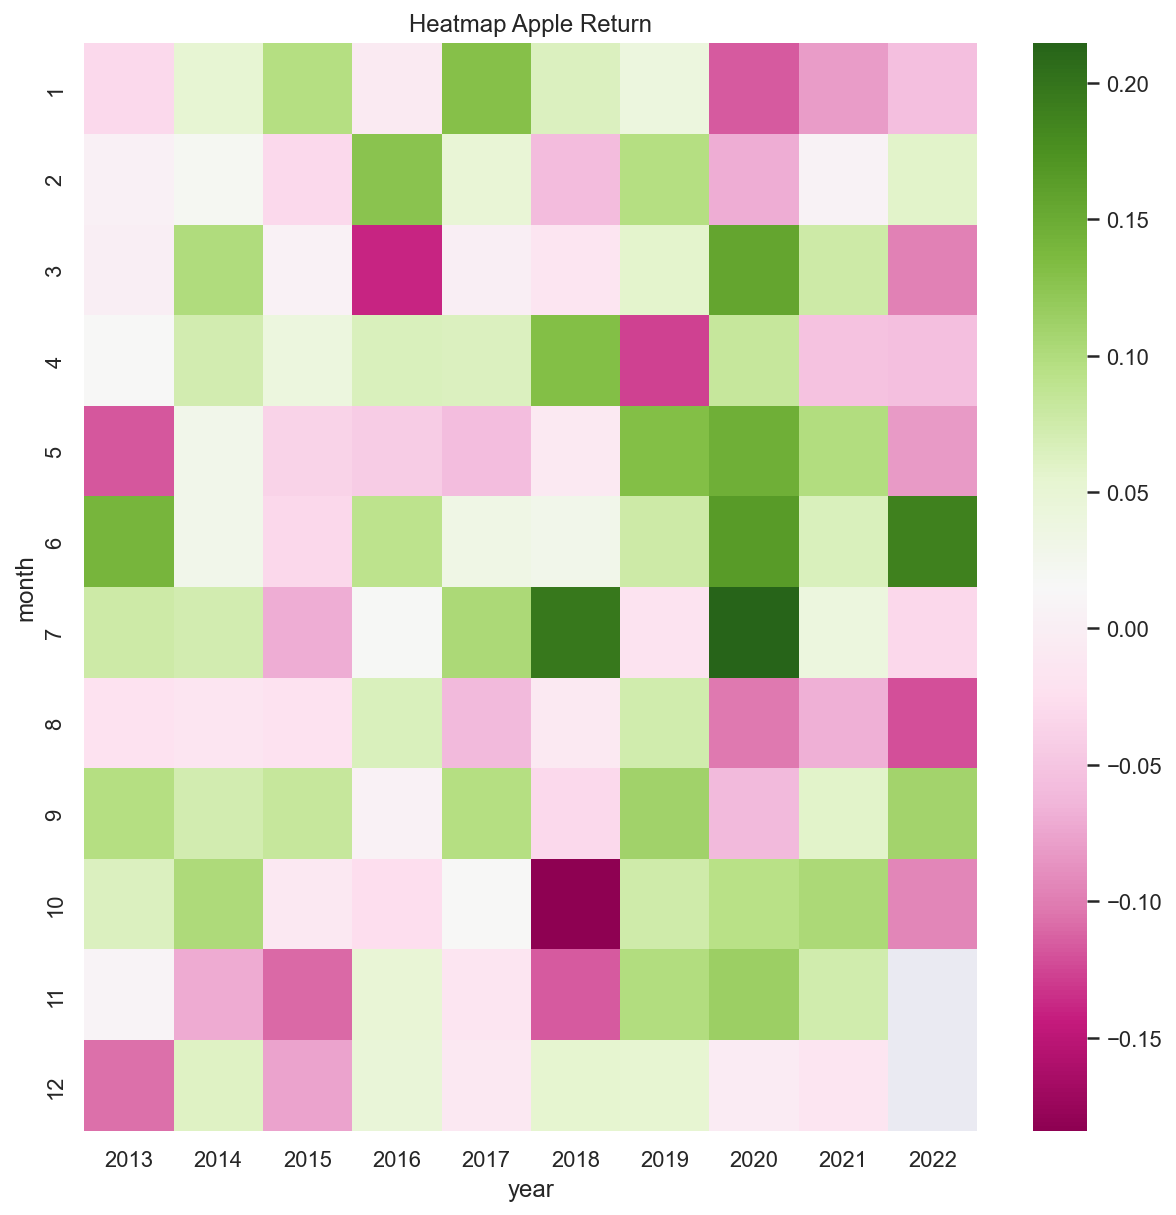

In [412]:
sns.set()

fig, ax = plt.subplots(figsize=(10,10))

season = df.pivot("month", "year", "pct_change_m")
ax = sns.heatmap(season,cmap="PiYG",ax=ax)
plt.title("Heatmap Apple Return")
plt.show()

# สรุป
- ซื้อ apple เดือน 6 ชนะ 9 จาก 10 (เดือน) คิดเป็น 90% ย้อนหลัง 10 ปี
- ผลตอบแทนเฉลี่ยเดือน 6 อยู่ที่ 7.63% ย้อนหลัง 10 ปี
- ผลตอบแทนเดือน 6 หมายถึงใช้ราคา close วันที่ 1 เดือน 6 เทียบกับราคาปิดวันที่ 1 เดือน 7